#<h1><center>**SCICROP**</center></h1>
##<h1><center>Processo seletivo para Estágio em Data Science</center></h1>
<h1><center>Natalia Yin San Lee</center></h1>




  Apesar do agro gerar muito lucro, a vida dos agricultores não é fácil, mas sim um verdadeiro teste de resistência e determinação. Uma vez que tenhamos semeado as sementes, o agricultor precisa trabalhar dia e noite para garantir uma boa safra no final da estação. Uma boa colheita depende de diversos fatores, como disponibilidade de água, fertilidade do solo, proteção das culturas, uso oportuno de pesticidas, outros fatores químicos úteis e da natureza.

​ Muitos desses dados são quase impossíveis de se controlar, mas a quantidade e a frequência de pesticidas é algo que o agricultor pode administrar. Os pesticidas podem protegem a colheita com a dosagem certa. Mas, se adicionados em quantidade inadequada, podem prejudicar toda a safra.

​ Dito isto, abaixo são fornecidos dados baseados em culturas colhidas por vários agricultores no final da safra de 2018-2019. Para simplificar o problema, você pode assumir que todos os fatores relacionados as técnicas agrícolas e climáticas, não influenciaram esses resultados.

​ Seu objetivo neste exercício é determinar o resultado desta safra atual de 2020, ou seja, se a colheita será saudável, prejudicada por pesticidas, ou prejudicada por outros motivos.

**Variável**	Descrição

**Identificador_Agricultor**	IDENTIFICADOR DO CLIENTE

**Estimativa_de_Insetos**	Estimativa de insetos por M²

**Tipo_de_Cultivo**	Classificação do tipo de cultivo (0,1)

**Tipo_de_Solo**	Classificação do tipo de solo (0,1)

**Categoria_Pesticida**	Informação do uso de pesticidas (1- Nunca Usou, 2-Já Usou, 3-Esta usando)

**Doses_Semana**	Número de doses por semana

**Semanas_Utilizando**	Número de semanas Utilizada

**Semanas_Sem_Uso**	Número de semanas sem utilizar

**Temporada**	Temporada Climática (1,2,3)

**dano_na_plantacao**	Variável de Predição - Dano no Cultivo (0=Sem Danos, 1=Danos causados por outros motivos, 2=Danos gerados pelos pesticidas)

#Importando Pacotes Necessários

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

# Conjunto de dados
Para acessar o conjunto de dados da Scicrop, é necessário acessar o link abaixo:

https://raw.githubusercontent.com/natyslee93/jobs-datascience/master/Safra_2018-2019.csv

https://raw.githubusercontent.com/natyslee93/jobs-datascience/master/Safra_2020.csv

Os arquivos foram copiados para o Google Drive, no qual serão acessados abaixo.

###Dados do ano 2018_2019

In [311]:

#Conjunto de dados da Safra de 2018 e 2019
df_2018_2019 = pd.read_csv("https://raw.githubusercontent.com/natyslee93/jobs-datascience/master/Safra_2018-2019.csv", delimiter=",")
print('2018/2019 - Dataframe dimensions:', df_2018_2019.shape)
df_2018_2019.head(10)

2018/2019 - Dataframe dimensions: (80000, 11)


,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1
5,5,SCROP00006,448,0,1,1,0,NaN,0,2,1
6,6,SCROP00007,448,0,1,1,0,NaN,0,2,1
7,7,SCROP00008,577,1,0,1,0,0.0,0,1,2
8,8,SCROP00009,731,0,0,1,0,0.0,0,2,0
9,9,SCROP00010,1132,1,0,1,0,0.0,0,1,2


## Dados do ano 2020

In [312]:

df_2020 = pd.read_csv("https://raw.githubusercontent.com/natyslee93/jobs-datascience/master/Safra_2020.csv", delimiter=",")
print('2020 - Dataframe dimensions:', df_2020.shape)
df_2020.head(10)

2020 - Dataframe dimensions: (8858, 10)


,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,80000,SCROP80001,256,0,1,2,35,11.0,9,1
1,80001,SCROP80002,283,0,1,2,5,5.0,6,1
2,80002,SCROP80003,283,0,1,2,15,15.0,5,2
3,80003,SCROP80004,283,0,1,2,15,NaN,7,2
4,80004,SCROP80005,283,0,1,2,15,19.0,2,1
5,80005,SCROP80006,283,0,1,2,30,11.0,7,3
6,80006,SCROP80007,311,0,1,2,10,7.0,9,1
7,80007,SCROP80008,311,0,1,2,20,19.0,7,2
8,80008,SCROP80009,312,0,1,2,25,12.0,12,3
9,80009,SCROP80010,311,0,1,2,30,18.0,2,3


#Entendendo os dados
Os arquivos obtidos no Github são os seguintes:

**Safra_2018_2019.csv**

**Safra_2020.csv**

Número total de dados:
*   Safra_2018_2019.csv: 80.000
*   Safra_2020.csv: 8.858

Dados encontrados:

*   Identificador_Agricultor
*   Estimativa_de_Insetos
*   Tipo_de_Cultivo
*   Tipo_de_Solo
*   Categoria_Pesticida
*   Doses_Semana
*   Semanas_Utilizando
*   Semanas_Sem_Uso
*   Temporada
*   dano_na_plantacao

Dos dois grupos de dados, os da Safra de 2018/2019 serão utilizados para o treinamento de uma previsão da Safra de 2020. O método de análise utilizado será o da Árvore de Decisão, no qual os **dados de entrada**(X) serão:

Estimativa de insetos, Tipo de Cultivo, Tipo de Solo, Categoria Pesticida, Doses Semana, Semanas utilizando, Semana sem uso e Temporada.

E os **dados de saída**(y):

Dano na Plantação.


Agora, os tipos de dados que foram fornecidos são importantes para o Pré-Processamento e posterior treinamento.

In [313]:
df_2018_2019.dtypes

Unnamed: 0                    int64
Identificador_Agricultor     object
Estimativa_de_Insetos         int64
Tipo_de_Cultivo               int64
Tipo_de_Solo                  int64
Categoria_Pesticida           int64
Doses_Semana                  int64
Semanas_Utilizando          float64
Semanas_Sem_Uso               int64
Temporada                     int64
dano_na_plantacao             int64
dtype: object

In [314]:
df_2020.dtypes

Unnamed: 0                    int64
Identificador_Agricultor     object
Estimativa_de_Insetos         int64
Tipo_de_Cultivo               int64
Tipo_de_Solo                  int64
Categoria_Pesticida           int64
Doses_Semana                  int64
Semanas_Utilizando          float64
Semanas_Sem_Uso               int64
Temporada                     int64
dtype: object

#Pré-Processamento
Primeiro será feito o pré-processamento dos dados para depois criar o vetor X_2019 com os dados de entrada e outro y_2019 com os dados de saída.

Como pode ser observado, em algumas linhas da Coluna **Semanas_Utilizando** estavam sem informações, aparecendo escrito **nan**(Not A Number). Por isso, é necessário realizar uma normalização dos dados apresentados, alterando o valor ou eliminando as linhas nas quais **nan** está presente. Como a abrangência de valores que podem ser adotados é grande, caso não sejam muitos dados, as linhas serão eliminadas.

In [315]:
df_2018_2019 = df_2018_2019.drop(['Unnamed: 0'], axis = 1)

df_2018_2019 = df_2018_2019.replace('', np.NaN)
df_2018_2019 = df_2018_2019.dropna(axis = 0, how='any')
print('2018/2019 - Dataframe dimensions:', df_2018_2019.shape)
df_2018_2019.head(10)


2018/2019 - Dataframe dimensions: (71945, 10)


,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,SCROP00005,342,1,0,1,0,0.0,0,2,1
7,SCROP00008,577,1,0,1,0,0.0,0,1,2
8,SCROP00009,731,0,0,1,0,0.0,0,2,0
9,SCROP00010,1132,1,0,1,0,0.0,0,1,2
11,SCROP00012,1575,0,0,1,0,0.0,0,1,1
12,SCROP00013,1575,0,1,1,0,0.0,0,2,1


In [316]:
df_2020 = df_2020.drop(['Unnamed: 0'], axis = 1)

df_2020 = df_2020.replace('', np.NaN)
df_2020 = df_2020.dropna(axis = 0, how='any')
print('2020 - Dataframe dimensions:', df_2020.shape)
df_2020.head(10)

2020 - Dataframe dimensions: (7913, 9)


,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada
0,SCROP80001,256,0,1,2,35,11.0,9,1
1,SCROP80002,283,0,1,2,5,5.0,6,1
2,SCROP80003,283,0,1,2,15,15.0,5,2
4,SCROP80005,283,0,1,2,15,19.0,2,1
5,SCROP80006,283,0,1,2,30,11.0,7,3
6,SCROP80007,311,0,1,2,10,7.0,9,1
7,SCROP80008,311,0,1,2,20,19.0,7,2
8,SCROP80009,312,0,1,2,25,12.0,12,3
9,SCROP80010,311,0,1,2,30,18.0,2,3
10,SCROP80011,312,0,1,2,30,27.0,3,2


O número de linhas que não apresentam valores são de 8.055 e 945 para os dados de 2018/2019 e os dados de 2020, respectivamente.

Dimensão dos dados **2018/2019**: 80.000-71.945 = 8.055 -> **10,07%**

Dimensão dos dados **2020**: 8.858-7.913 = 945 -> **10,67%**

In [317]:
X_2019 = df_2018_2019[['Estimativa_de_Insetos','Tipo_de_Cultivo','Tipo_de_Solo',
                       'Categoria_Pesticida','Doses_Semana','Semanas_Utilizando',
                       'Semanas_Sem_Uso','Temporada']].values
X_2019[0:5]

array([[188.,   1.,   0.,   1.,   0.,   0.,   0.,   1.],
       [209.,   1.,   0.,   1.,   0.,   0.,   0.,   2.],
       [257.,   1.,   0.,   1.,   0.,   0.,   0.,   2.],
       [257.,   1.,   1.,   1.,   0.,   0.,   0.,   2.],
       [342.,   1.,   0.,   1.,   0.,   0.,   0.,   2.]])

In [318]:
y_2019 = df_2018_2019["dano_na_plantacao"]
y_2019[0:5]

0    0
1    1
2    1
3    1
4    1
Name: dano_na_plantacao, dtype: int64

In [319]:
X_2020 = df_2020[['Estimativa_de_Insetos','Tipo_de_Cultivo','Tipo_de_Solo',
                  'Categoria_Pesticida','Doses_Semana','Semanas_Utilizando',
                  'Semanas_Sem_Uso','Temporada']].values
X_2020[0:5]

array([[256.,   0.,   1.,   2.,  35.,  11.,   9.,   1.],
       [283.,   0.,   1.,   2.,   5.,   5.,   6.,   1.],
       [283.,   0.,   1.,   2.,  15.,  15.,   5.,   2.],
       [283.,   0.,   1.,   2.,  15.,  19.,   2.,   1.],
       [283.,   0.,   1.,   2.,  30.,  11.,   7.,   3.]])

#Configuração da Árvore de Decisão
Agora será utilizado o **train/test split** em nossa **árvore de decisão**.

In [320]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X_2019, y_2019, test_size=0.25, random_state=3)

In [321]:
X_trainset.shape

(53958, 8)

In [322]:

y_trainset.shape

(53958,)

In [323]:
X_testset.shape

(17987, 8)

In [324]:
y_testset.shape

(17987,)

#Modelagem
Primeiro será criada uma instância do **DecisionTreeClassifier** nomeado **danoTree**.
Dentro do classificador, especifique criterion = "entropy" para que possamos ver o ganho de informação de cada nó.

In [325]:
#danoTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
danoTree = DecisionTreeClassifier(max_depth = 2, random_state = 0)

danoTree # exibe os parâmetros default

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

Em seguida, vamos ajustar o conjunto de dados com a matriz de características **X_trainset** e o vetor de resposta de treinamento **y_trainset**.

In [326]:
danoTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

#Predição para 2019/2018
Vamos fazer algumas **predições** usando o conjunto de dados de validação (teste) e salvar na variável chamada **predTree**

In [327]:
predTree = danoTree.predict(X_testset)
print(predTree[0:10])
print(y_testset[0:10])

[0 0 0 0 0 0 0 0 0 0]
11348    0
7032     0
75845    0
19369    0
45670    0
25368    0
6125     0
20792    1
72162    0
54261    0
Name: dano_na_plantacao, dtype: int64


#Avaliação
Em seguida, a **metrics** será importada do sklearn e a precisão do modelo verificada.

In [328]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisão da Árvore de Decisão: ", metrics.accuracy_score(y_testset, predTree))

Precisão da Árvore de Decisão:  0.837382554066826


Como pode ser visto a previsão foi feita para os dados de 2018/2019 com 83,73% de precisão. Sendo essa precisão alta, essa previsão será transportada para os dados de 2020 para fazer a previsão para este ano.

#Predição para 2020

In [329]:
X_testset2020 = X_2020

In [330]:
predTree2020 = danoTree.predict(X_testset2020)
print(predTree2020[1000:1100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [331]:
y_2020 = predTree2020

In [334]:
df_y_2020 = pd.DataFrame(predTree2020)
df_y_2020

,0
0,0
1,0
2,0
3,0
4,0
...,...
7908,0
7909,0
7910,0
7911,0


In [335]:
No = np.array(range(7913))
df_y_2020['No'] = No
df_2020['No'] = No
df_2020_pred= pd.DataFrame.merge(df_2020, df_y_2020)
df_2020_pred.rename(columns ={0:'dano_na_plantacao '}, inplace = True)
df_2020_pred.drop('No', axis = 1, inplace = True)

df_2020_pred

,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,SCROP80001,256,0,1,2,35,11.0,9,1,0
1,SCROP80002,283,0,1,2,5,5.0,6,1,0
2,SCROP80003,283,0,1,2,15,15.0,5,2,0
3,SCROP80005,283,0,1,2,15,19.0,2,1,0
4,SCROP80006,283,0,1,2,30,11.0,7,3,0
...,...,...,...,...,...,...,...,...,...,...
7908,SCROP88854,3337,1,0,2,10,12.0,44,3,0
7909,SCROP88855,3516,1,0,2,10,20.0,38,1,0
7910,SCROP88856,3516,1,0,2,15,40.0,8,2,0
7911,SCROP88857,3702,1,0,2,10,25.0,18,3,0


In [337]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline


[Text(167.4, 181.2, 'X[5] <= 39.5\ngini = 0.283\nsamples = 53958\nvalue = [45033, 7575, 1350]'),
 Text(83.7, 108.72, 'X[3] <= 1.5\ngini = 0.212\nsamples = 42598\nvalue = [37536, 4463, 599]'),
 Text(41.85, 36.23999999999998, 'gini = 0.494\nsamples = 500\nvalue = [71, 336, 93]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.198\nsamples = 42098\nvalue = [37465, 4127, 506]'),
 Text(251.10000000000002, 108.72, 'X[3] <= 2.5\ngini = 0.485\nsamples = 11360\nvalue = [7497, 3112, 751]'),
 Text(209.25, 36.23999999999998, 'gini = 0.353\nsamples = 5599\nvalue = [4381, 1030, 188]'),
 Text(292.95, 36.23999999999998, 'gini = 0.567\nsamples = 5761\nvalue = [3116, 2082, 563]')]

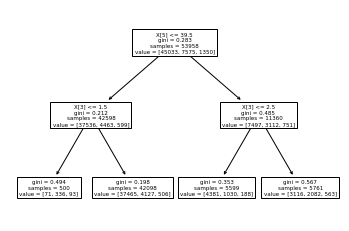

In [338]:
tree.plot_tree(danoTree)

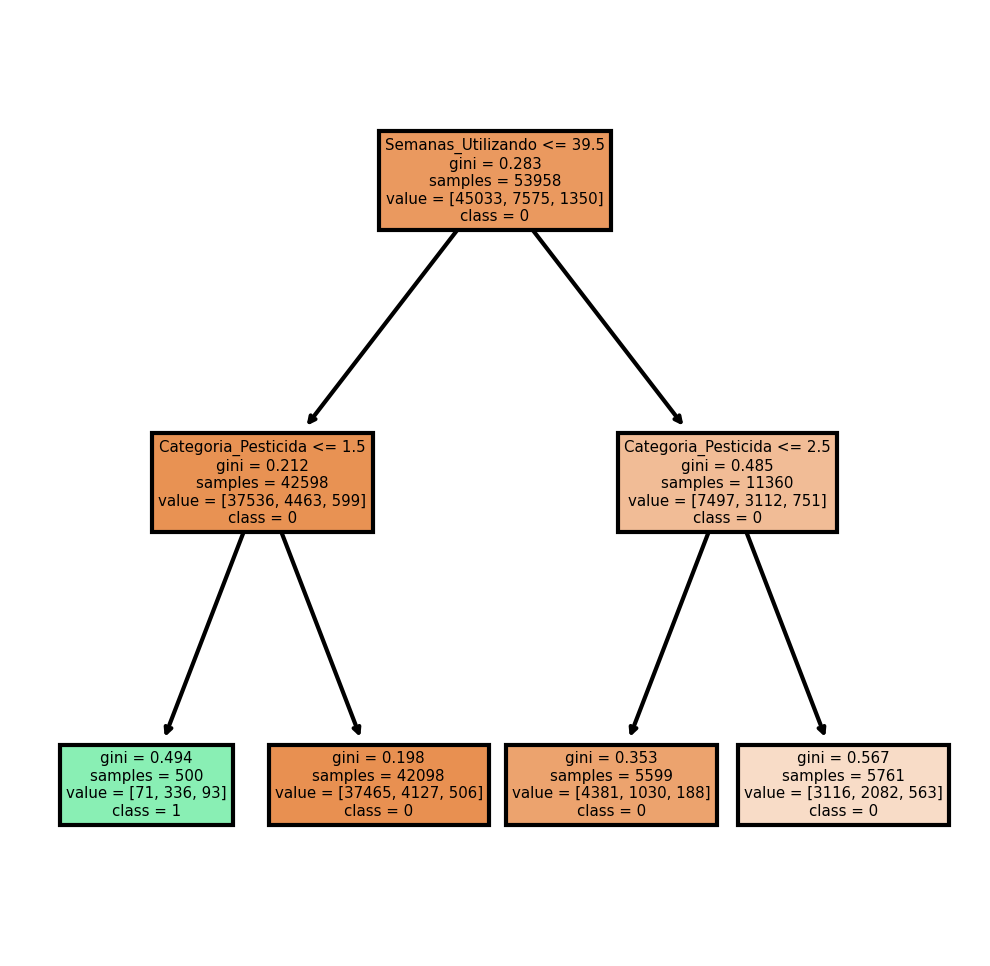

In [339]:
fn=['Estimativa_de_Insetos','Tipo_de_Cultivo','Tipo_de_Solo',
                  'Categoria_Pesticida','Doses_Semana','Semanas_Utilizando',
                  'Semanas_Sem_Uso','Temporada']
cn=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(danoTree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('danoTree.png')

#Modelagem 2020

In [344]:
#danoTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
danoTree2020 = DecisionTreeClassifier(max_depth = 7, random_state = 0)

danoTree2020.fit(X_trainset2020, y_2020)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

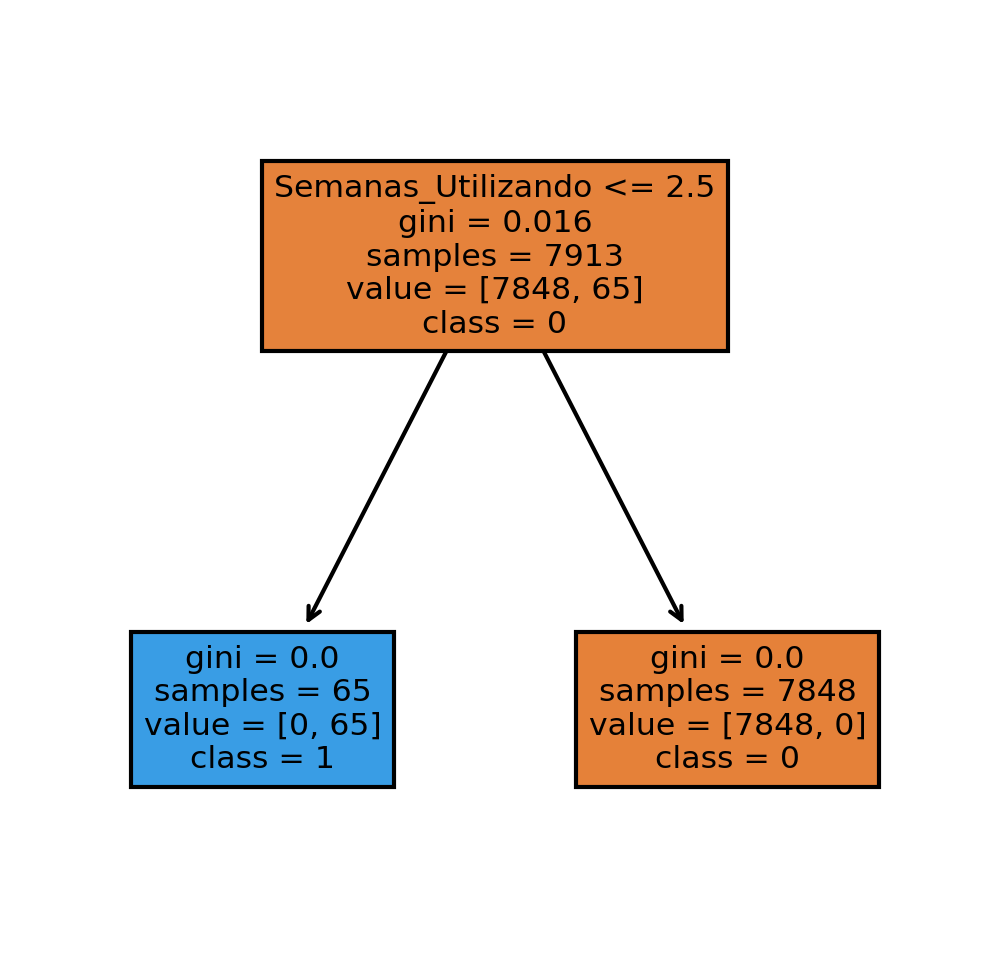

In [345]:
fn2=['Estimativa_de_Insetos','Tipo_de_Cultivo','Tipo_de_Solo',
                  'Categoria_Pesticida','Doses_Semana','Semanas_Utilizando',
                  'Semanas_Sem_Uso','Temporada']
cn2=['0', '1', '2']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(danoTree2020,
               feature_names = fn2, 
               class_names=cn2,
               filled = True);
fig.savefig('danoTree2020.png')

Como pode ser observado, para a previsão de 2020 estima-se que **65** das plantações terão **danos por outros motivos**, enquanto **7848** estarão **sem danos**.